### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [49]:
data = pd.read_csv('data/coupons.csv')

In [51]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [34]:
data.fillna('0')

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,0,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,0,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,0,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,0,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,0,4~8,1~3,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0


3. Decide what to do about your missing data -- drop, replace, other...

In [53]:
data = data.replace("never", "0")

In [55]:
data = data.fillna("0")
data

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,0,0,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,0,0,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,0,0,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,0,0,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,0,0,4~8,1~3,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,0,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,0,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,0,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,0,1~3,4~8,1~3,1,1,1,0,1,0


In [57]:
data.isnull().sum()

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
car                     0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64

In [59]:
total_rows = data.shape[0]
total_rows

12684

In [61]:
Data_CouponAccepted = data['Y'].sum()
print(Data_CouponAccepted)

7210


4. What proportion of the total observations chose to accept the coupon?



In [63]:
Ratio_Coupons_Accepted = Data_CouponAccepted / total_rows
print(Ratio_Coupons_Accepted)

0.5684326710816777


5. Use a bar plot to visualize the `coupon` column.

In [56]:
print(data['coupon'].value_counts())

coupon
Coffee House             3996
Restaurant(<20)          2786
Carry out & Take away    2393
Bar                      2017
Restaurant(20-50)        1492
Name: count, dtype: int64


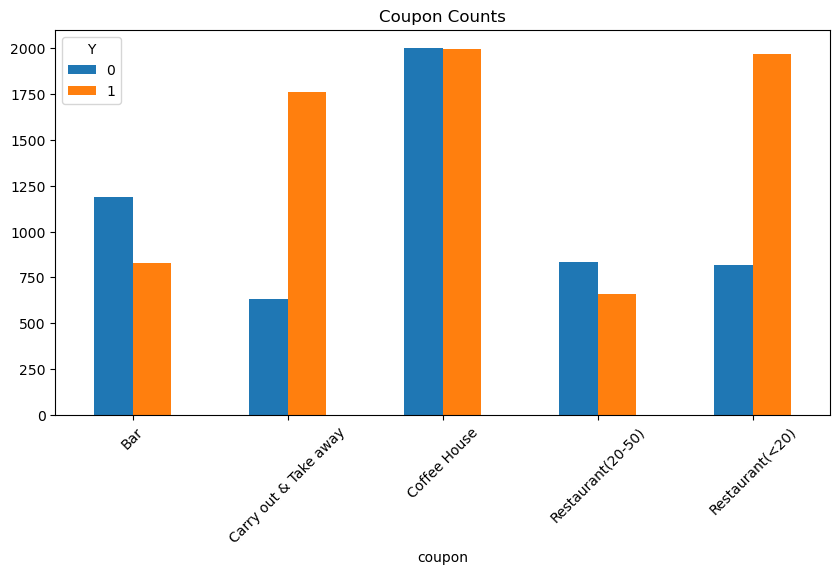

In [69]:
CouponsGrouped = data.groupby(['coupon', 'Y']).size().unstack()
CouponsGrouped.plot(kind="bar", stacked=False, figsize=(10,5), title="Coupon Counts")
plt.xticks(rotation=45)
plt.show()

6. Use a histogram to visualize the temperature column.

Text(0.5, 1.0, 'Histogram of Temperature')

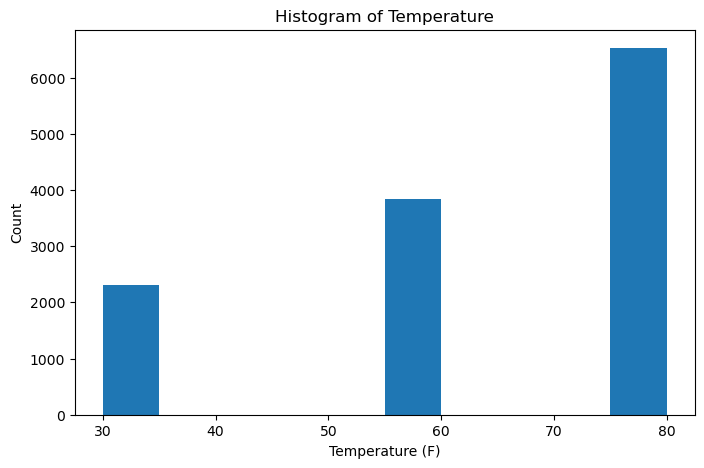

In [99]:
plt.figure(figsize=(8, 5))
plt.hist(data['temperature'])
plt.xlabel("Temperature (F)")
plt.ylabel("Count")
plt.title("Histogram of Temperature")


In [101]:
print(data['temperature'].value_counts())

temperature
80    6528
55    3840
30    2316
Name: count, dtype: int64


([<matplotlib.axis.XTick at 0x168fb1d30>,
 [Text(30, 0, '30'), Text(55, 0, '55'), Text(80, 0, '80')])

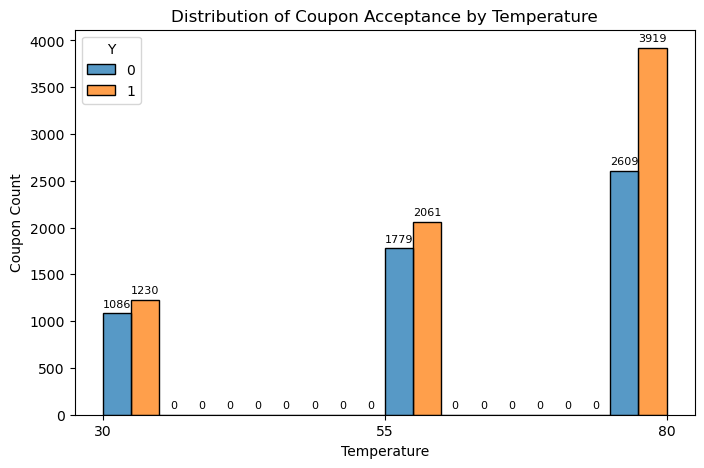

In [127]:
plt.figure(figsize=(8, 5))
Temphist = sns.histplot(data=data, x="temperature", hue="Y", multiple="dodge", bins=10)

for container in Temphist.containers:
    Temphist.bar_label(container, fmt='%d', label_type='edge', fontsize=8, padding=3)

plt.xlabel("Temperature")
plt.ylabel("Coupon Count")
plt.title("Distribution of Coupon Acceptance by Temperature")
plt.xticks([30, 55, 80])

In [111]:
print(data.groupby('temperature').sum()['Y'])

temperature
30    1230
55    2061
80    3919
Name: Y, dtype: int64


**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [252]:
barcoupons = data[data['coupon']== "Bar"].copy()
barcoupons.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2017 entries, 9 to 12682
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           2017 non-null   object
 1   passanger             2017 non-null   object
 2   weather               2017 non-null   object
 3   temperature           2017 non-null   int64 
 4   time                  2017 non-null   object
 5   coupon                2017 non-null   object
 6   expiration            2017 non-null   object
 7   gender                2017 non-null   object
 8   age                   2017 non-null   object
 9   maritalStatus         2017 non-null   object
 10  has_children          2017 non-null   int64 
 11  education             2017 non-null   object
 12  occupation            2017 non-null   object
 13  income                2017 non-null   object
 14  car                   2017 non-null   object
 15  Bar                   2017 non-null   obje

2. What proportion of bar coupons were accepted?


In [389]:
total_rows_data = data.shape[0]
barcoupons_accepted = barcoupons['Y'].sum()
propotion_barcoupons_accepted = barcoupons_accepted / total_rows_barcoupons
print(propotion_barcoupons_accepted)

0.41001487357461575


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [256]:
barcoupons['Bar'].unique()

array(['0', 'less1', '1~3', 'gt8', '4~8'], dtype=object)

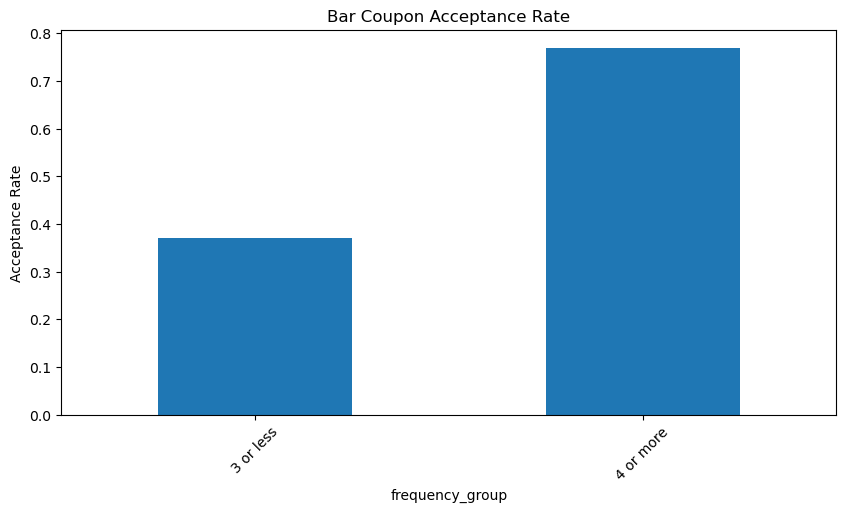

frequency_group
3 or less    0.370737
4 or more    0.768844
Name: Y, dtype: float64


In [387]:
frequency_mapping = {
    '0': '3 or less',
    'less1': '3 or less',
    '1~3': '3 or less',
    'gt8': '4 or more',
    '4~8': '4 or more'
}
if 'Bar' in barcoupons.columns:
    barcoupons.loc[:, 'frequency_group'] = barcoupons['Bar'].map(frequency_mapping)

barcouponscomparison = barcoupons.groupby('frequency_group')['Y'].mean()
barcouponscomparison.plot(kind="bar", figsize=(10,5), title="Bar Coupon Acceptance Rate")
plt.ylabel('Acceptance Rate')
plt.xticks(rotation=45)
plt.show()
print(barcouponscomparison)

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


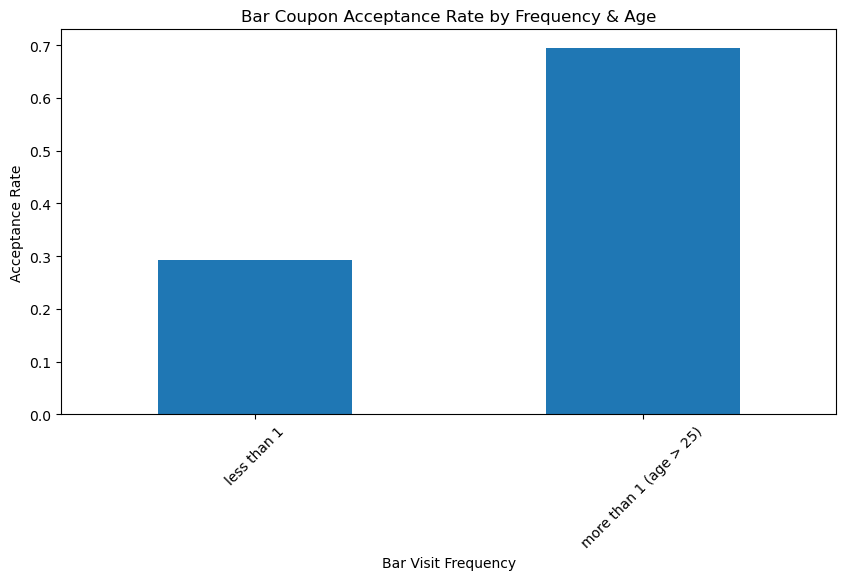

In [260]:
barcoupons['age'] = barcoupons['age'].replace('50plus', '50')
barcoupons['age'] = barcoupons['age'].replace('below21', '20')
barcoupons['age'] = pd.to_numeric(barcoupons['age'])


frequency_mapping2= {
    '0': 'less than 1',
    'less1': 'less than 1',
    '1~3': 'more than 1',
    'gt8': 'more than 1',
    '4~8': 'more than 1'
}

if 'Bar' in barcoupons.columns:
    barcoupons.loc[barcoupons.index, 'frequency_group2'] = barcoupons['Bar'].map(frequency_mapping2)

acceptance_rates = pd.Series({
    'less than 1': barcoupons.loc[barcoupons['frequency_group2'] == 'less than 1', 'Y'].mean(),
    'more than 1 (age > 25)': barcoupons.loc[(barcoupons['frequency_group2'] == 'more than 1') & (barcoupons['age'] > 25), 'Y'].mean()
})

acceptance_rates.plot(kind="bar", figsize=(10,5), title="Bar Coupon Acceptance Rate by Frequency & Age")
plt.ylabel('Acceptance Rate')
plt.xlabel('Bar Visit Frequency')
plt.xticks(rotation=45)
plt.show()

In [262]:
print(acceptance_rates)

less than 1               0.293455
more than 1 (age > 25)    0.695238
dtype: float64


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


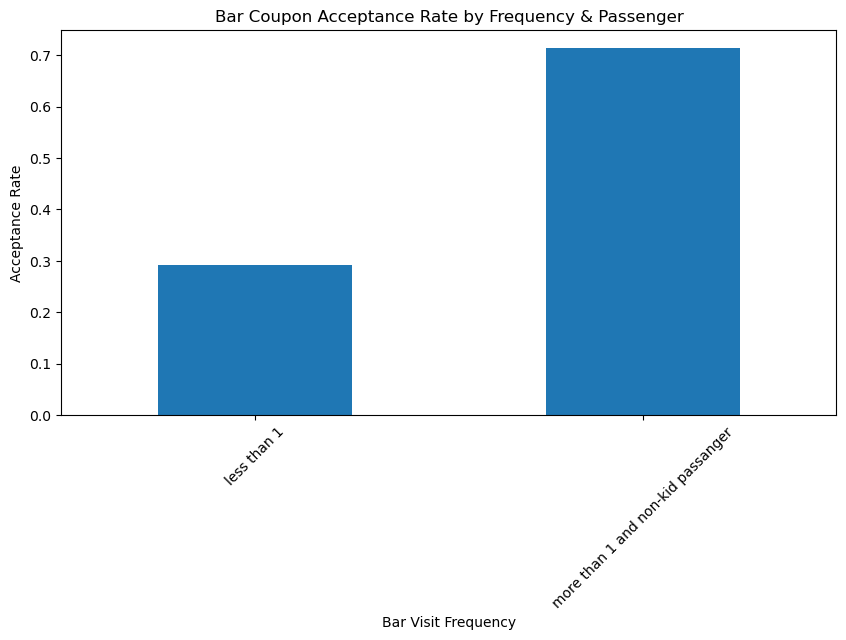

In [264]:
barcoupons_occfilter = barcoupons[~barcoupons['occupation'].isin(['Farming Fishing & Forestry'])]

frequency_mapping2= {
    '0': 'less than 1',
    'less1': 'less than 1',
    '1~3': 'more than 1',
    'gt8': 'more than 1',
    '4~8': 'more than 1'
}

if 'Bar' in barcoupons_occfilter.columns:
    barcoupons_occfilter.loc[barcoupons_occfilter.index, 'frequency_group2'] = barcoupons_occfilter['Bar'].map(frequency_mapping2)

acceptance_rates_occfilter = pd.Series({
    'less than 1': barcoupons_occfilter.loc[barcoupons_occfilter['frequency_group2'] == 'less than 1', 'Y'].mean(),
    'more than 1 and non-kid passanger': barcoupons_occfilter.loc[(barcoupons_occfilter['frequency_group2'] == 'more than 1') & (barcoupons_occfilter['passanger'].isin(['Alone', 'Friend(s)', 'Partner'])), 'Y'].mean()
})

acceptance_rates_occfilter.plot(kind="bar", figsize=(10,5), title="Bar Coupon Acceptance Rate by Frequency & Passenger")
plt.ylabel('Acceptance Rate')
plt.xlabel('Bar Visit Frequency')
plt.xticks(rotation=45)
plt.show()

In [266]:
print(acceptance_rates_occfilter)

less than 1                          0.292493
more than 1 and non-kid passanger    0.713249
dtype: float64


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [268]:
cheaprestcoupons = data[data['coupon']== "Restaurant(<20)"].copy()
cheaprestcoupons['income'].unique()

array(['$37500 - $49999', '$62500 - $74999', '$12500 - $24999',
       '$75000 - $87499', '$50000 - $62499', '$25000 - $37499',
       '$100000 or More', '$87500 - $99999', 'Less than $12500'],
      dtype=object)

In [270]:
cheaprestcoupons['coupon'].unique()

array(['Restaurant(<20)'], dtype=object)

In [272]:
cheaprestcoupons.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2786 entries, 0 to 12678
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           2786 non-null   object
 1   passanger             2786 non-null   object
 2   weather               2786 non-null   object
 3   temperature           2786 non-null   int64 
 4   time                  2786 non-null   object
 5   coupon                2786 non-null   object
 6   expiration            2786 non-null   object
 7   gender                2786 non-null   object
 8   age                   2786 non-null   object
 9   maritalStatus         2786 non-null   object
 10  has_children          2786 non-null   int64 
 11  education             2786 non-null   object
 12  occupation            2786 non-null   object
 13  income                2786 non-null   object
 14  car                   2786 non-null   object
 15  Bar                   2786 non-null   obje

In [328]:
income_groups_mapping = {
    '$37500 - $49999': 'less than $50K',
    '$62500 - $74999': 'more than $50K',
    '$12500 - $24999': 'less than $50K',
    '$75000 - $87499': 'more than $50K',
    '$50000 - $62499': 'more than $50K',
    '$25000 - $37499': 'less than $50K',
    '$100000 or More': 'more than $50K',
    '$87500 - $99999': 'more than $50K',
    'Less than $12500': 'less than $50K'
}

frequency_mapping2 = {
    '0': 'less than 1',
    'less1': 'less than 1',
    '1~3': 'more than 1',
    'gt8': 'more than 1',
    '4~8': 'more than 1'
}

frequency_mapping3 = {
    '0': 'less than 1',
    'less1': 'less than 1',
    '1~3': 'more than 1',
    'gt8': 'more than 4',
    '4~8': 'more than 4'
}

if 'income' in cheaprestcoupons.columns:
    cheaprestcoupons.loc[cheaprestcoupons.index, 'income_groups'] = cheaprestcoupons['income'].map(income_groups_mapping)

if 'RestaurantLessThan20' in cheaprestcoupons.columns:
    cheaprestcoupons.loc[cheaprestcoupons.index, 'frequency_group3'] = cheaprestcoupons['RestaurantLessThan20'].map(frequency_mapping3)

if 'Bar' in barcoupons.columns:
    barcoupons.loc[barcoupons.index, 'frequency_group2'] = barcoupons['Bar'].map(frequency_mapping2)


In [330]:
unique_incomes = cheaprestcoupons.loc[cheaprestcoupons['frequency_group3'] == 'more than 4', 'income'].unique()
print(unique_incomes)

['$37500 - $49999' '$62500 - $74999' '$100000 or More' '$50000 - $62499'
 '$25000 - $37499' '$75000 - $87499' '$87500 - $99999' '$12500 - $24999'
 'Less than $12500']


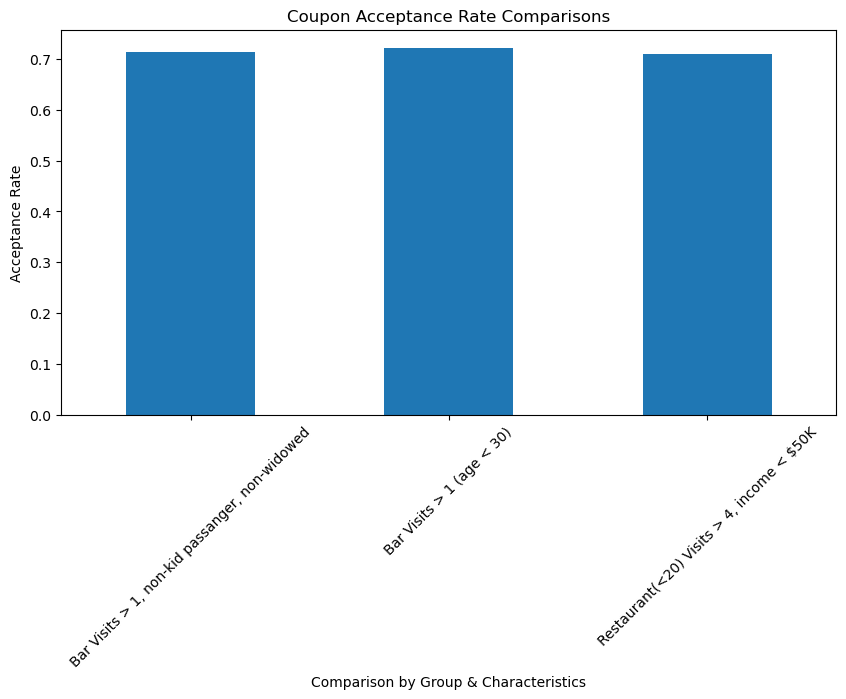

Bar Visits > 1, non-kid passanger, non-widowed    0.713249
Bar Visits > 1 (age < 30)                         0.721739
Restaurant(<20) Visits > 4, income < $50K         0.710891
dtype: float64


In [332]:
acceptance_rates_compare = pd.Series({
    'Bar Visits > 1, non-kid passanger, non-widowed': 
        barcoupons.loc[
            (barcoupons['frequency_group2'] == 'more than 1') & 
            (barcoupons['passanger'].isin(['Alone', 'Friend(s)', 'Partner'])) & 
            (~barcoupons['maritalStatus'].isin(['Widowed'])),
            'Y'
        ].mean(),
    'Bar Visits > 1 (age < 30)': 
        barcoupons.loc[
            (barcoupons['frequency_group2'] == 'more than 1') & 
            (barcoupons['age'] < 30),
            'Y'
        ].mean(),
    'Restaurant(<20) Visits > 4, income < $50K': 
        cheaprestcoupons.loc[
            (cheaprestcoupons['frequency_group3'] == 'more than 4') & 
            (cheaprestcoupons['income_groups'] == 'less than $50K'),
            'Y'
        ].mean()
})

acceptance_rates_compare.plot(kind="bar", figsize=(10, 5), title="Coupon Acceptance Rate Comparisons")
plt.ylabel('Acceptance Rate')
plt.xlabel('Comparison by Group & Characteristics')
plt.xticks(rotation=45)
plt.show()
print(acceptance_rates_compare)

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

Of the above exercises, the most significant factor for drivers accepting a bar coupon or not is whether or not the driver has been to the restaurant or bar before. In fact, the rate more than doubles between a driver who visits bars less than 1 time per month with no passenger (29% acceptance rate) and a driver who frequents bars more than once a month but had passengers at the time they recieved the coupon (71%). There was little difference in the rate of coupon acceptance between a driver with non-kid passengers and the driver under 30 year old driver with no passengers if they have both frequented bars more than once pre month. 

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [345]:
print(data['destination'].value_counts())

destination
No Urgent Place    6283
Home               3237
Work               3164
Name: count, dtype: int64


In [363]:
data_no_urgent = data[data['destination'] == 'No Urgent Place'].copy()
data_home = data[data['destination'] == 'Home'].copy()
data_work = data[data['destination'] == 'Work'].copy()

In [353]:
total_rows_data_home = data_home.shape[0]
coupons_accepted_data_home = data_home['Y'].sum()
propotion_coupons_accepted_data_home = coupons_accepted_data_home / total_rows_data_home

print(propotion_coupons_accepted_data_home)


0.5063330244053136


In [365]:
total_rows_data_no_urgent = data_no_urgent.shape[0]
coupons_accepted_data_no_urgent = data_no_urgent['Y'].sum()
propotion_coupons_accepted_data_no_urgent = coupons_accepted_data_no_urgent / total_rows_data_no_urgent
print(propotion_coupons_accepted_data_no_urgent)

0.633773674996021


In [367]:
total_rows_data_work = data_work.shape[0]
coupons_accepted_data_work = data_work['Y'].sum()
propotion_coupons_accepted_data_work = coupons_accepted_data_work / total_rows_data_work
print(propotion_coupons_accepted_data_work)

0.5022123893805309


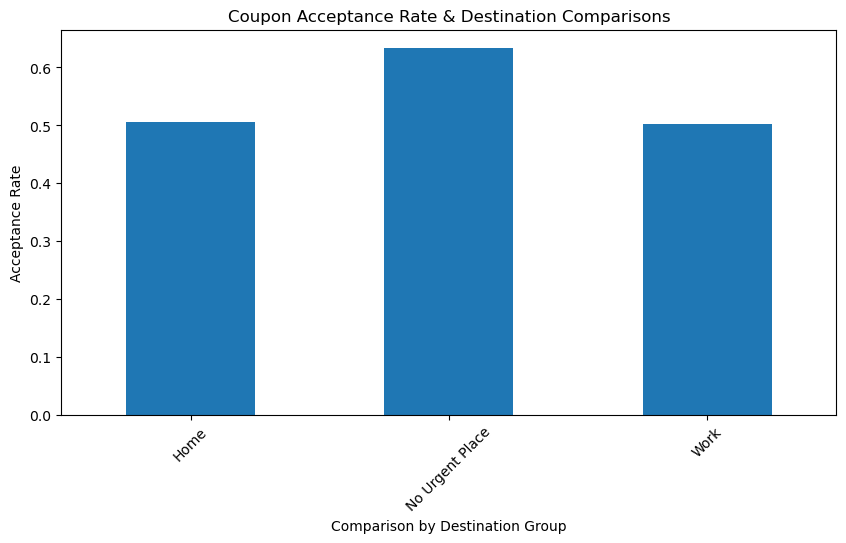

In [369]:
destination_acceptance_rates_compare = pd.Series({
    'Home': propotion_coupons_accepted_data_home,
    'No Urgent Place': propotion_coupons_accepted_data_no_urgent,
    'Work': propotion_coupons_accepted_data_work
})

destination_acceptance_rates_compare.plot(kind="bar", figsize=(10, 5), title="Coupon Acceptance Rate & Destination Comparisons")
plt.ylabel('Acceptance Rate')
plt.xlabel('Comparison by Destination Group')
plt.xticks(rotation=45)
plt.show()

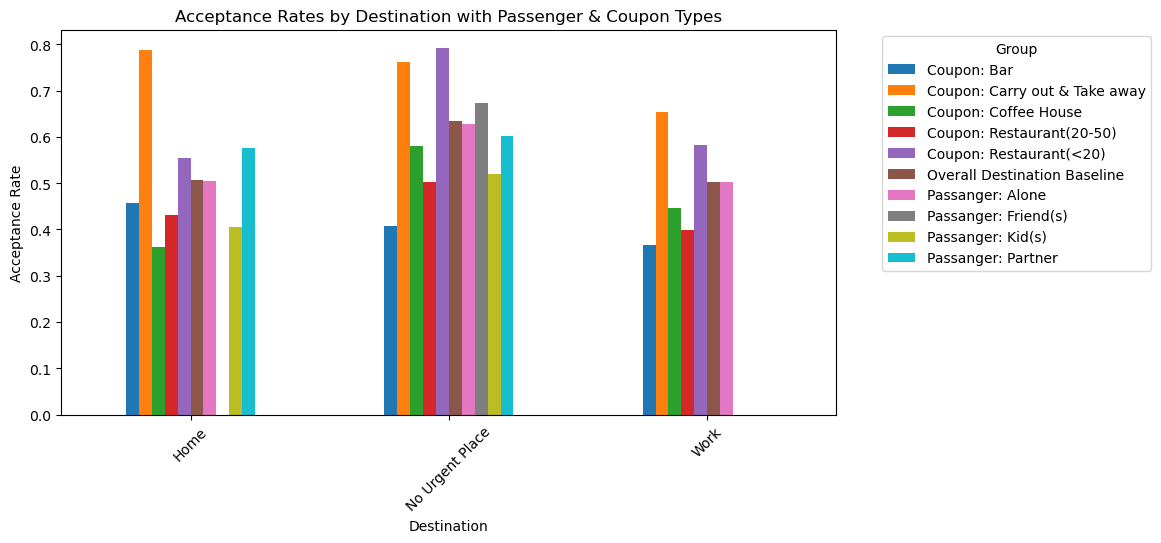

In [375]:
baseline = data.groupby("destination")["Y"].mean().reset_index()
baseline["Group"] = "Overall Destination Baseline"
baseline.rename(columns={"Y": "AcceptanceRate"}, inplace=True)

passanger = data.groupby(["destination", "passanger"])["Y"].mean().reset_index()
passanger["Group"] = "Passanger: " + passanger["passanger"]
passanger.rename(columns={"Y": "AcceptanceRate"}, inplace=True)

coupon = data.groupby(["destination", "coupon"])["Y"].mean().reset_index()
coupon["Group"] = "Coupon: " + coupon["coupon"]
coupon.rename(columns={"Y": "AcceptanceRate"}, inplace=True)

destination_data_all = pd.concat([
    baseline[["destination", "AcceptanceRate", "Group"]],
    passanger[["destination", "AcceptanceRate", "Group"]],
    coupon[["destination", "AcceptanceRate", "Group"]]
], ignore_index=True)

pivot_destination_data_all = destination_data_all.pivot(index="destination", columns="Group", values="AcceptanceRate")


pivot_destination_data_all.plot(kind="bar", figsize=(10, 5), title="Acceptance Rates by Destination with Passenger & Coupon Types")
plt.xlabel("Destination")
plt.ylabel("Acceptance Rate")
plt.xticks(rotation=45)
plt.legend(title="Group", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

In [377]:
print(data[data['passanger'] == "Friend(s)"]['destination'].value_counts())

destination
No Urgent Place    3298
Name: count, dtype: int64


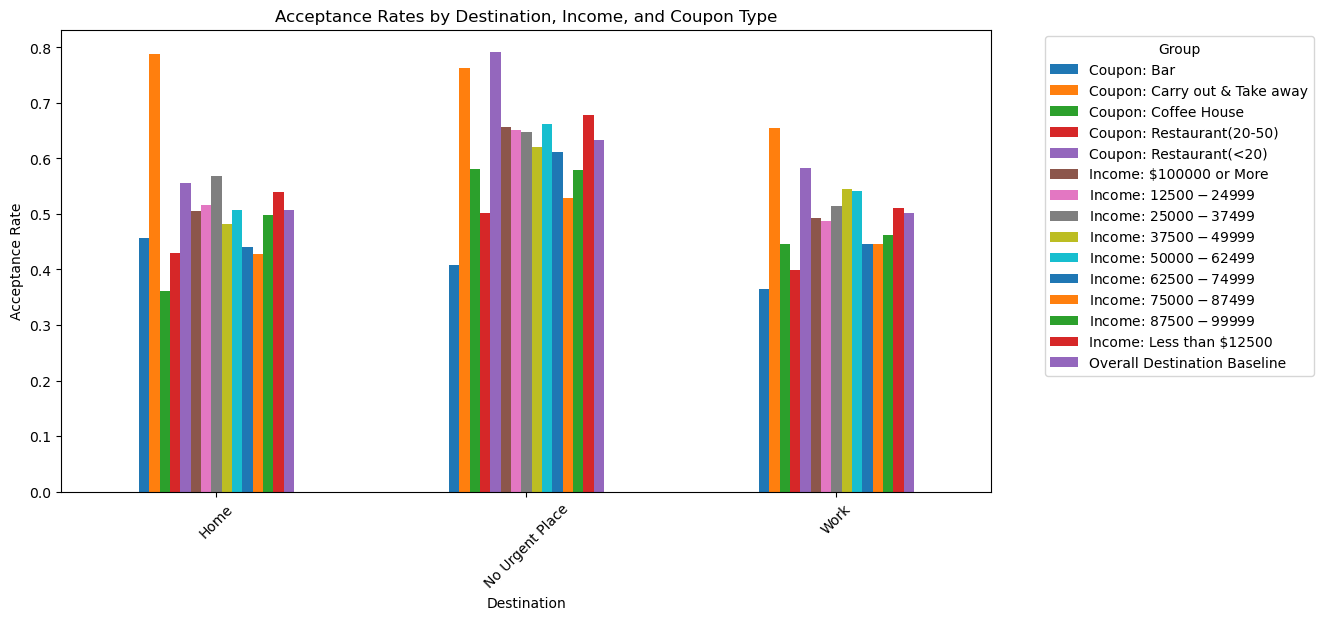

In [381]:
income = data.groupby(["destination", "income"])["Y"].mean().reset_index()
income["Group"] = "Income: " + income["income"]
income.rename(columns={"Y": "AcceptanceRate"}, inplace=True)

coupon = data.groupby(["destination", "coupon"])["Y"].mean().reset_index()
coupon["Group"] = "Coupon: " + coupon["coupon"]
coupon.rename(columns={"Y": "AcceptanceRate"}, inplace=True)

destination_data_all2 = pd.concat([
    baseline[["destination", "AcceptanceRate", "Group"]],
    income[["destination", "AcceptanceRate", "Group"]],
    coupon[["destination", "AcceptanceRate", "Group"]]
], ignore_index=True)

pivot_destination_data_all2 = destination_data_all2.pivot(index="destination", columns="Group", values="AcceptanceRate")
pivot_destination_data_all2.plot(kind="bar", figsize=(12, 6), title="Acceptance Rates by Destination, Income, and Coupon Type")
plt.xlabel("Destination")
plt.ylabel("Acceptance Rate")
plt.xticks(rotation=45)
plt.legend(title="Group", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

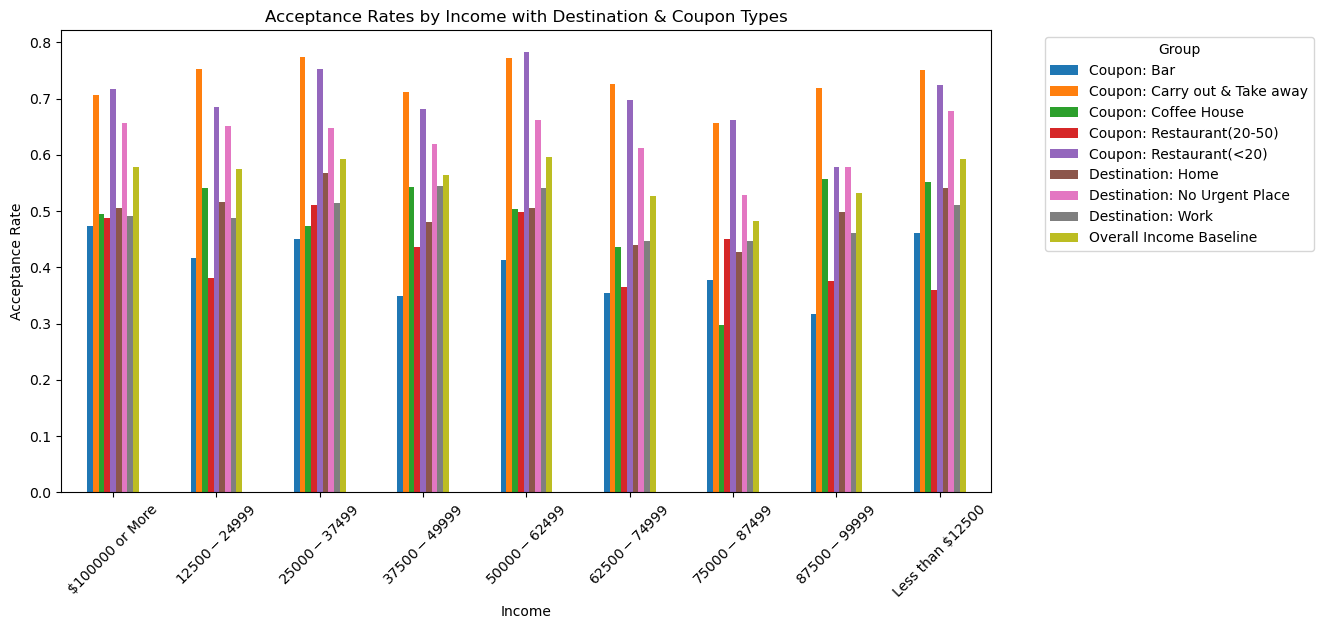

In [385]:
baseline_income = data.groupby("income")["Y"].mean().reset_index()
baseline_income["Group"] = "Overall Income Baseline"
baseline_income.rename(columns={"Y": "AcceptanceRate"}, inplace=True)

destination = data.groupby(["income", "destination"])["Y"].mean().reset_index()
destination["Group"] = "Destination: " + destination["destination"]
destination.rename(columns={"Y": "AcceptanceRate"}, inplace=True)

coupon = data.groupby(["income", "coupon"])["Y"].mean().reset_index()
coupon["Group"] = "Coupon: " + coupon["coupon"]
coupon.rename(columns={"Y": "AcceptanceRate"}, inplace=True)

income_data_all = pd.concat([
    baseline_income[["income", "AcceptanceRate", "Group"]],
    destination[["income", "AcceptanceRate", "Group"]],
    coupon[["income", "AcceptanceRate", "Group"]]
], ignore_index=True)

pivot_income_data_all = income_data_all.pivot(index="income", columns="Group", values="AcceptanceRate")

pivot_income_data_all.plot(kind="bar", figsize=(12, 6), title="Acceptance Rates by Income with Destination & Coupon Types")
plt.xlabel("Income")
plt.ylabel("Acceptance Rate")
plt.xticks(rotation=45)
plt.legend(title="Group", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()